In [1]:
import pandas as pb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
mushrooms=pd.read_csv('mushrooms.csv')
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
mushrooms.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


'poisonous'-to-'edible' ratio: 0.93
poisonous_cnt: 3916,edible_cnt: 4208


<AxesSubplot:title={'center':'Balnace checking for input class in Mushroom Dataset'}, xlabel='class', ylabel='count'>

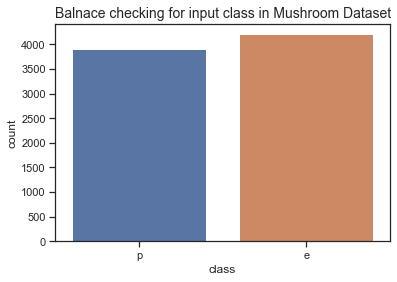

In [5]:
# check imput mushrooms balance
# 'poisonous'-to-'edible'ratio
edible_cnt=mushrooms[mushrooms['class'] =='e']['class'].count()
poisonous_cnt=mushrooms[mushrooms['class'] =='p']['class'].count()
p_e_ratio=poisonous_cnt/float(edible_cnt)
print("\n'poisonous'-to-'edible' ratio: {}\npoisonous_cnt: {},edible_cnt: {}".format(p_e_ratio.round(2),poisonous_cnt,edible_cnt))

#visulalize "e" vs "p" balance
sns.set(style='ticks',color_codes=True)
plt.title('Balnace checking for input class in Mushroom Dataset',fontsize=14)
sns.countplot(x=mushrooms['class'],data=mushrooms)

In [6]:
 # Mushrooms check-unique value
columns=mushrooms.columns.values
for column in columns:
    print("{0}: {1}".format(column,mushrooms[column].unique()))
print("\n there are {}'?'values in the faeture 'stalk-root'.".format(mushrooms[mushrooms['stalk-root'] == '?']['stalk-root'].count))   

class: ['p' 'e']
cap-shape: ['x' 'b' 's' 'f' 'k' 'c']
cap-surface: ['s' 'y' 'f' 'g']
cap-color: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises: ['t' 'f']
odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment: ['f' 'a']
gill-spacing: ['c' 'w']
gill-size: ['n' 'b']
gill-color: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape: ['e' 't']
stalk-root: ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring: ['s' 'f' 'k' 'y']
stalk-surface-below-ring: ['s' 'f' 'y' 'k']
stalk-color-above-ring: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type: ['p']
veil-color: ['w' 'n' 'o' 'y']
ring-number: ['o' 't' 'n']
ring-type: ['p' 'e' 'l' 'f' 'n']
spore-print-color: ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population: ['s' 'n' 'a' 'v' 'y' 'c']
habitat: ['u' 'g' 'm' 'd' 'p' 'w' 'l']

 there are <bound method Series.count of 3984    ?
4023    ?
4076    ?
4100    ?
4104    ?
       ..
8119    ?
8120    ?
8121    ?
8122    ?
8123    ?
Nam

In [7]:
# mushrooms pre-processing
mushrooms=mushrooms.drop("veil-type",axis=1)
mushrooms.shape

(8124, 22)

In [8]:
mushrooms_onehot=pd.get_dummies(mushrooms)

# mushrooms_onehot=mushrooms_onehot.drop(['class-e'],axis=1)

encoded=list(mushrooms_onehot.columns[1:])
print("{} total features after one-hot encoding.".format(len(encoded)))
print(encoded)

mushrooms_onehot.head(5)

117 total features after one-hot encoding.
['class_p', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y', 'cap-color_b', 'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n', 'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w', 'cap-color_y', 'bruises_f', 'bruises_t', 'odor_a', 'odor_c', 'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-attachment_a', 'gill-attachment_f', 'gill-spacing_c', 'gill-spacing_w', 'gill-size_b', 'gill-size_n', 'gill-color_b', 'gill-color_e', 'gill-color_g', 'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o', 'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w', 'gill-color_y', 'stalk-shape_e', 'stalk-shape_t', 'stalk-root_?', 'stalk-root_b', 'stalk-root_c', 'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_f', 'stalk-surface-above-ring_k', 'stalk-surface-above-ring_s', 'stalk-surface-ab

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


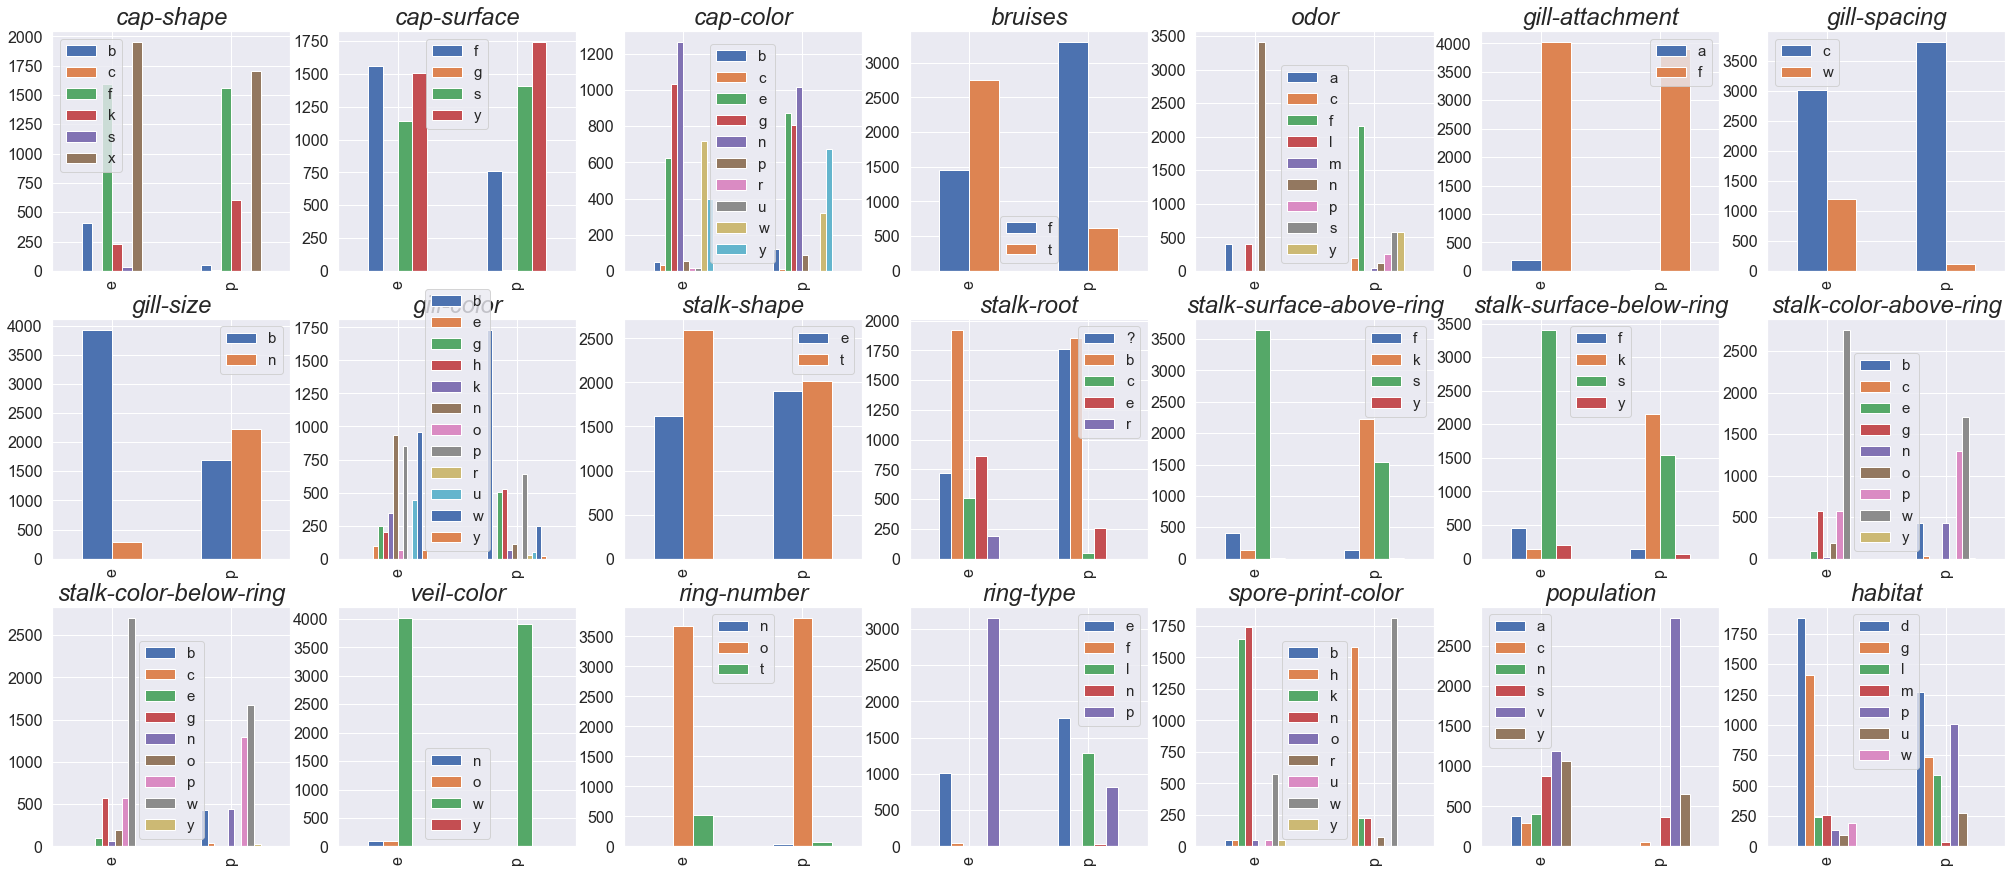

In [9]:
# Feature Important Analysis
feature_columns=mushrooms.columns[1:]
sns.set(style='darkgrid',color_codes=True)
fig,axes = plt.subplots(nrows=3,ncols=7,figsize=(35,15))
mushrooms['id']=np.arange(1,mushrooms.shape[0] + 1 )

for f,ax in zip(feature_columns, axes.ravel()):
    mushrooms.groupby(['class',f])['id'].count().unstack(f).plot(kind='bar',ax=ax,legend=True,grid=True,fontsize=16)
    ax.set_title(f,style='oblique',size=24)
    ax.set_xlabel('\n',style='normal',size=18)
    ax.legend(fontsize=15)
mushrooms=mushrooms.drop('id',axis=1)

In [10]:
# Feature correlation
corr=mushrooms_onehot.corr().loc[:,'class_p']
top_10_corr=corr.abs().sort_values(ascending=False).head(n=11).iloc[1:]
print('top-10 feature to class_p correlation:','\n\n',top_10_corr)

top_10_corr_ratio =pd.DataFrame(index=range(2))
for feature in top_10_corr.index:
    feature_grouped = mushrooms_onehot[['class_p',feature]].groupby([feature])
    top_10_corr_ratio.loc[:,feature]=100*feature_grouped.sum()/(poisonous_cnt)
    
print('\n\n top-10 feature-class_p poisonus Mushroom ratio:')
top_10_corr_ratio

top-10 feature to class_p correlation: 

 class_e                       1.000000
odor_n                        0.785557
odor_f                        0.623842
stalk-surface-above-ring_k    0.587658
stalk-surface-below-ring_k    0.573524
ring-type_p                   0.540469
gill-size_n                   0.540024
gill-size_b                   0.540024
gill-color_b                  0.538808
bruises_t                     0.501530
Name: class_p, dtype: float64


 top-10 feature-class_p poisonus Mushroom ratio:


,class_e,odor_n,odor_f,stalk-surface-above-ring_k,stalk-surface-below-ring_k,ring-type_p,gill-size_n,gill-size_b,gill-color_b,bruises_t
0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
mushrooms.corr

<bound method DataFrame.corr of      class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-above-rin

Visualize Top-10 feature to class_p correlation: 


<AxesSubplot:>

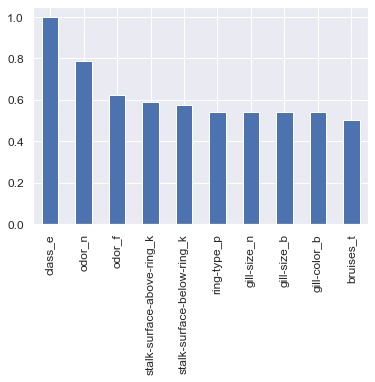

In [20]:
print('Visualize Top-10 feature to class_p correlation: ')
top_10_corr.plot(kind='bar',grid=True,fontsize=12)